Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3284 - val_loss: 0.2718
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2426 - val_loss: 0.2084
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1824 - val_loss: 0.1596
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1514 - val_loss: 0.1264
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1173 - val_loss: 0.1081
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1007 - val_loss: 0.1011
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0973 - val_loss: 0.0994
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0948 - val_loss: 0.0985
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0991 - val_loss: 0.0983
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1014 - val_loss: 0.0980
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0975 - val_loss: 0.0980
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0925 - val_loss: 0.0978


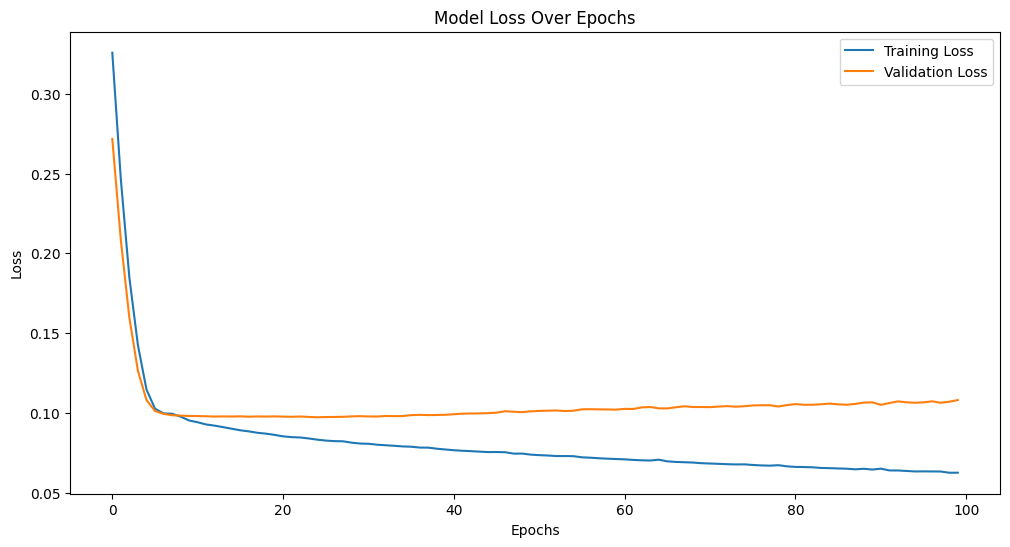

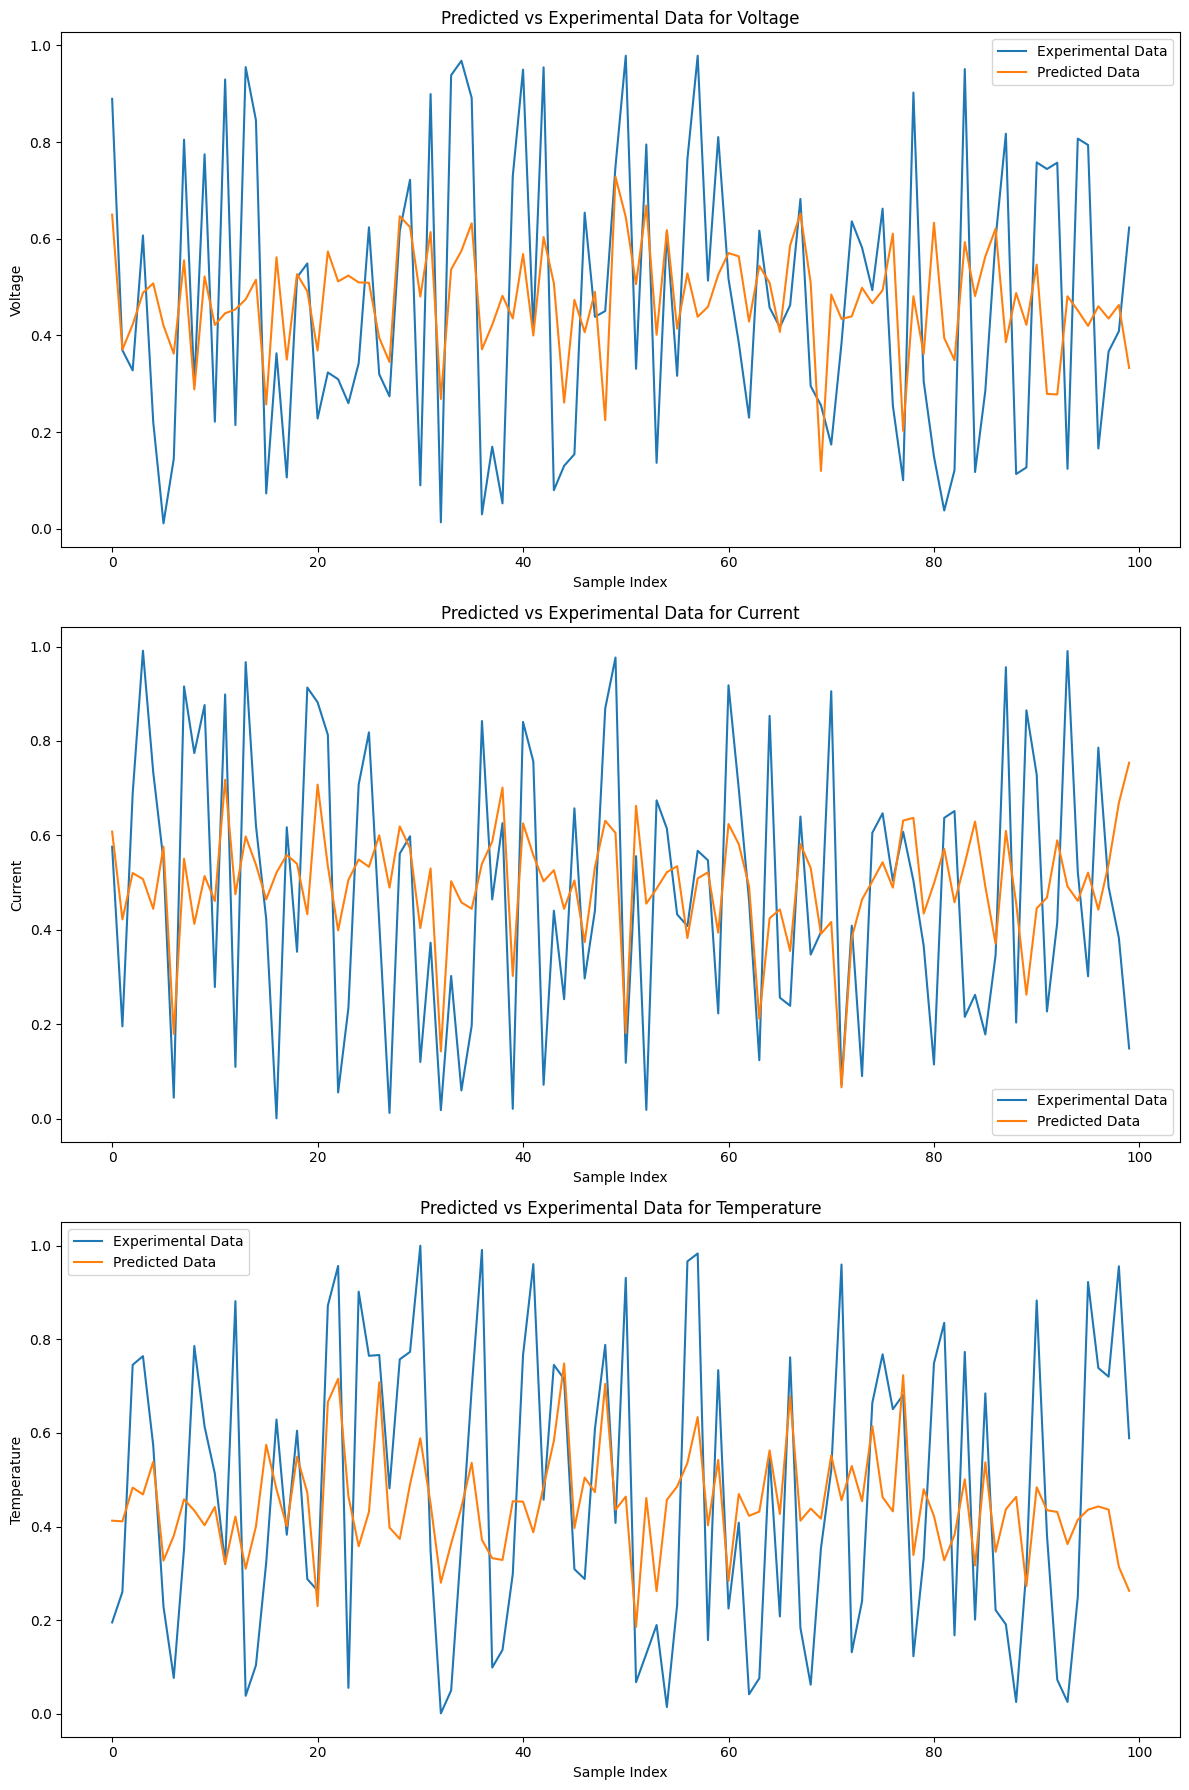

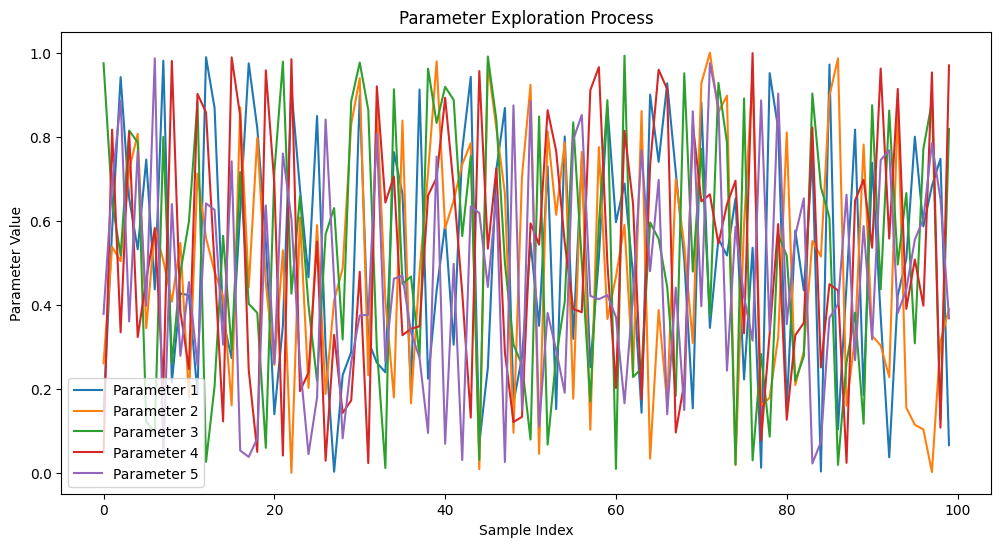

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np



params = np.random.rand(100, 5)  
outputs = np.random.rand(100, 3)  
exp_data = np.random.rand(100, 3)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(params.shape[1],)),
    Dense(64, activation='relu'),
    Dense(outputs.shape[1])  # Match output features
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model to match experimental data
history = model.fit(params, exp_data, validation_split=0.2, epochs=100, batch_size=16)

# Predict adjusted simulation outputs
adjusted_outputs = model.predict(params)

# Evaluate the model
loss = model.evaluate(params, exp_data)
print(f"Final Loss: {loss}")
import matplotlib.pyplot as plt

# Plot the loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.show()

# Plot the predicted vs experimental data for each output feature
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
output_labels = ['Voltage', 'Current', 'Temperature']

for i in range(3):
    axs[i].plot(exp_data[:, i], label='Experimental Data')
    axs[i].plot(adjusted_outputs[:, i], label='Predicted Data')
    axs[i].set_xlabel('Sample Index')
    axs[i].set_ylabel(output_labels[i])
    axs[i].set_title(f'Predicted vs Experimental Data for {output_labels[i]}')
    axs[i].legend()

plt.tight_layout()
plt.show()

# Plot the parameter exploration process
plt.figure(figsize=(12, 6))
for i in range(params.shape[1]):
    plt.plot(params[:, i], label=f'Parameter {i+1}')
plt.xlabel('Sample Index')
plt.ylabel('Parameter Value')
plt.title('Parameter Exploration Process')
plt.legend()
plt.show()

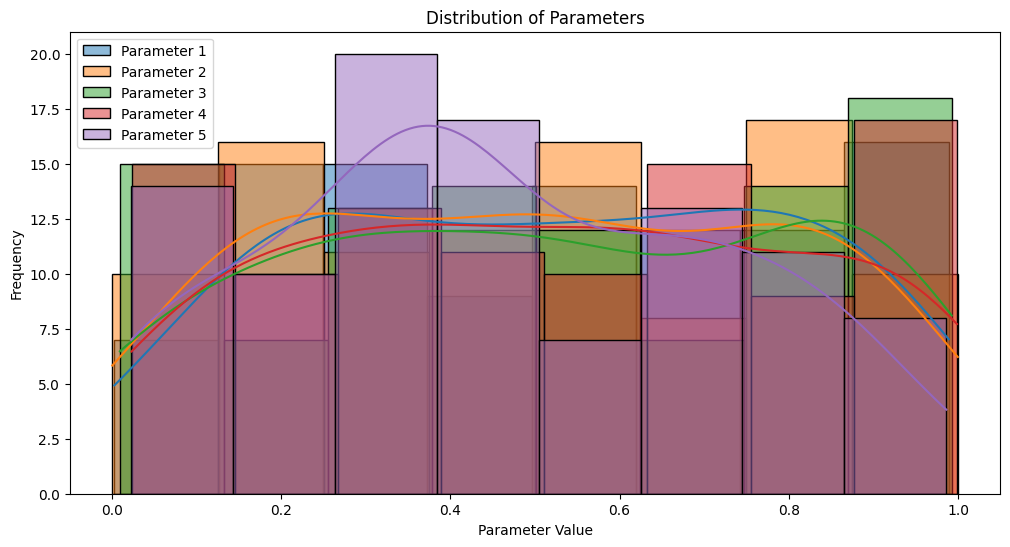

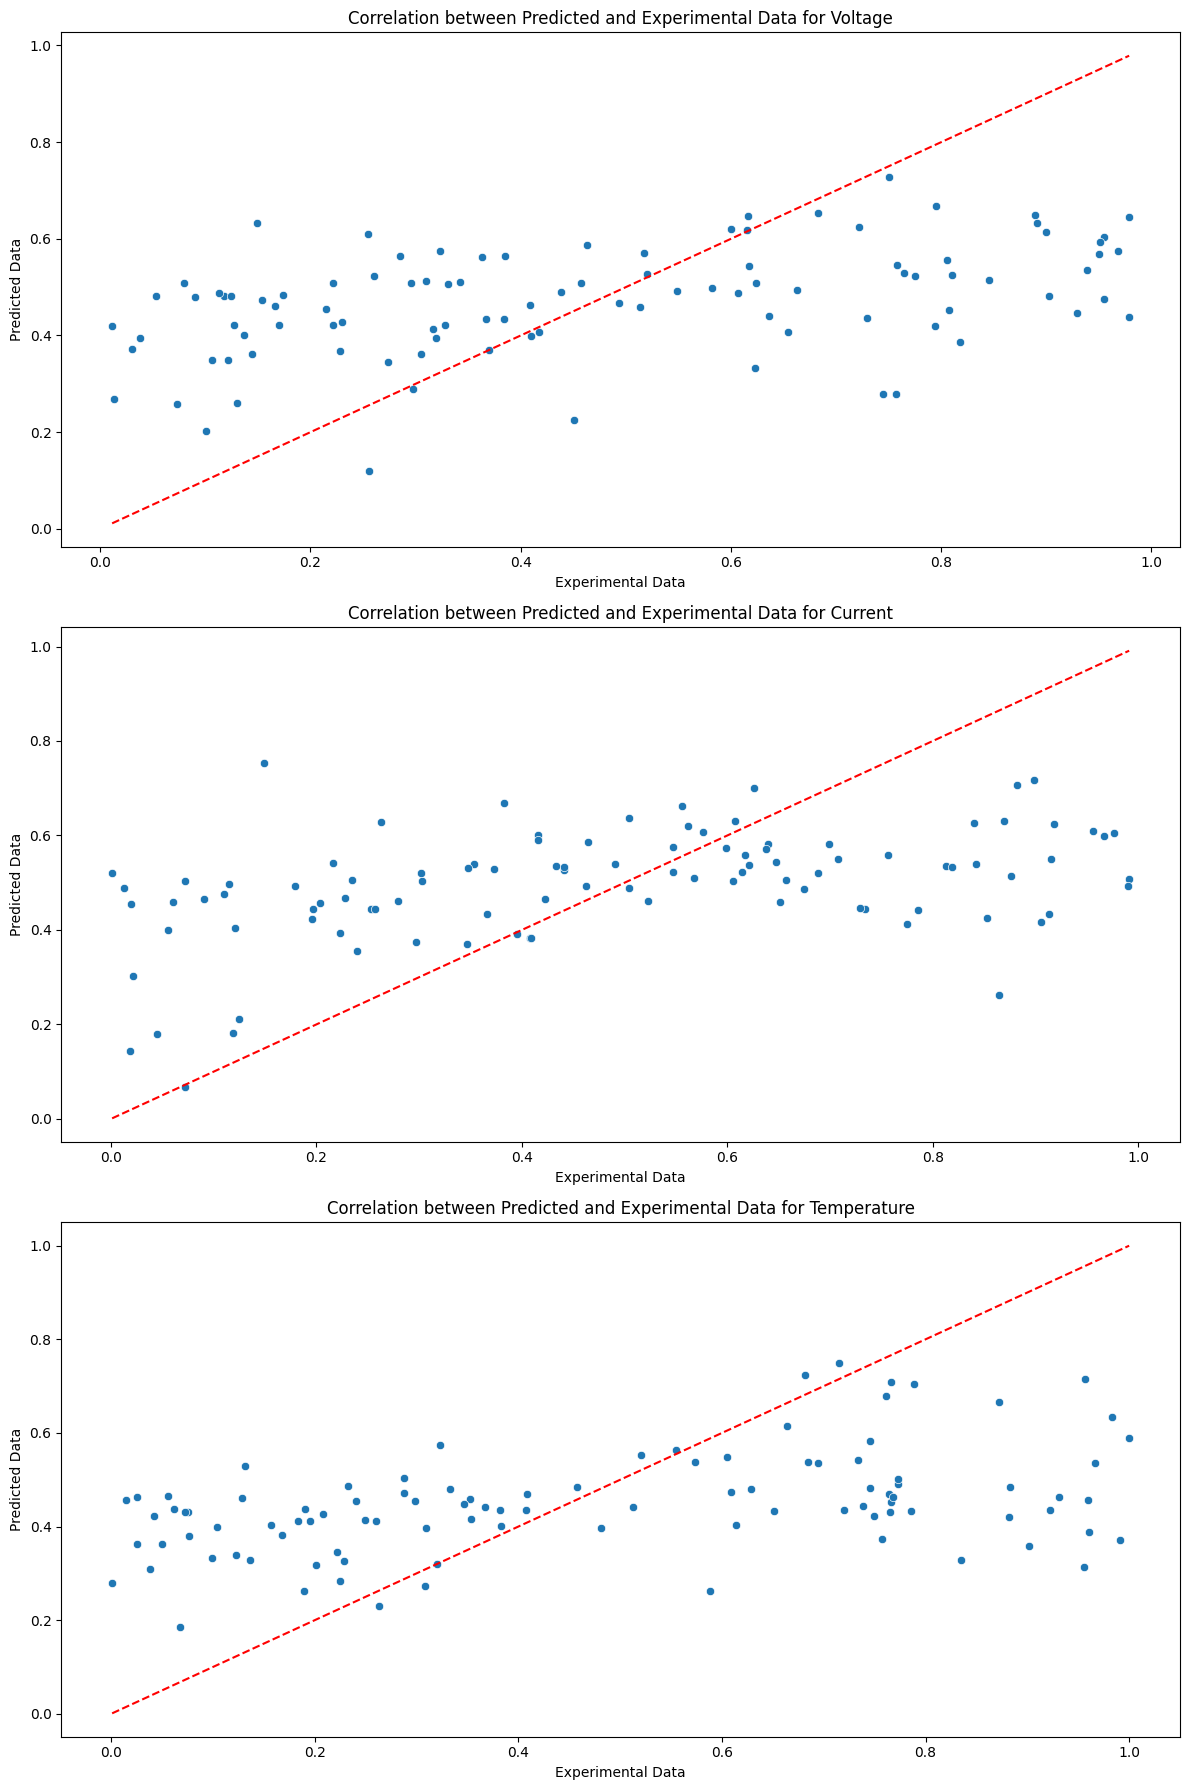

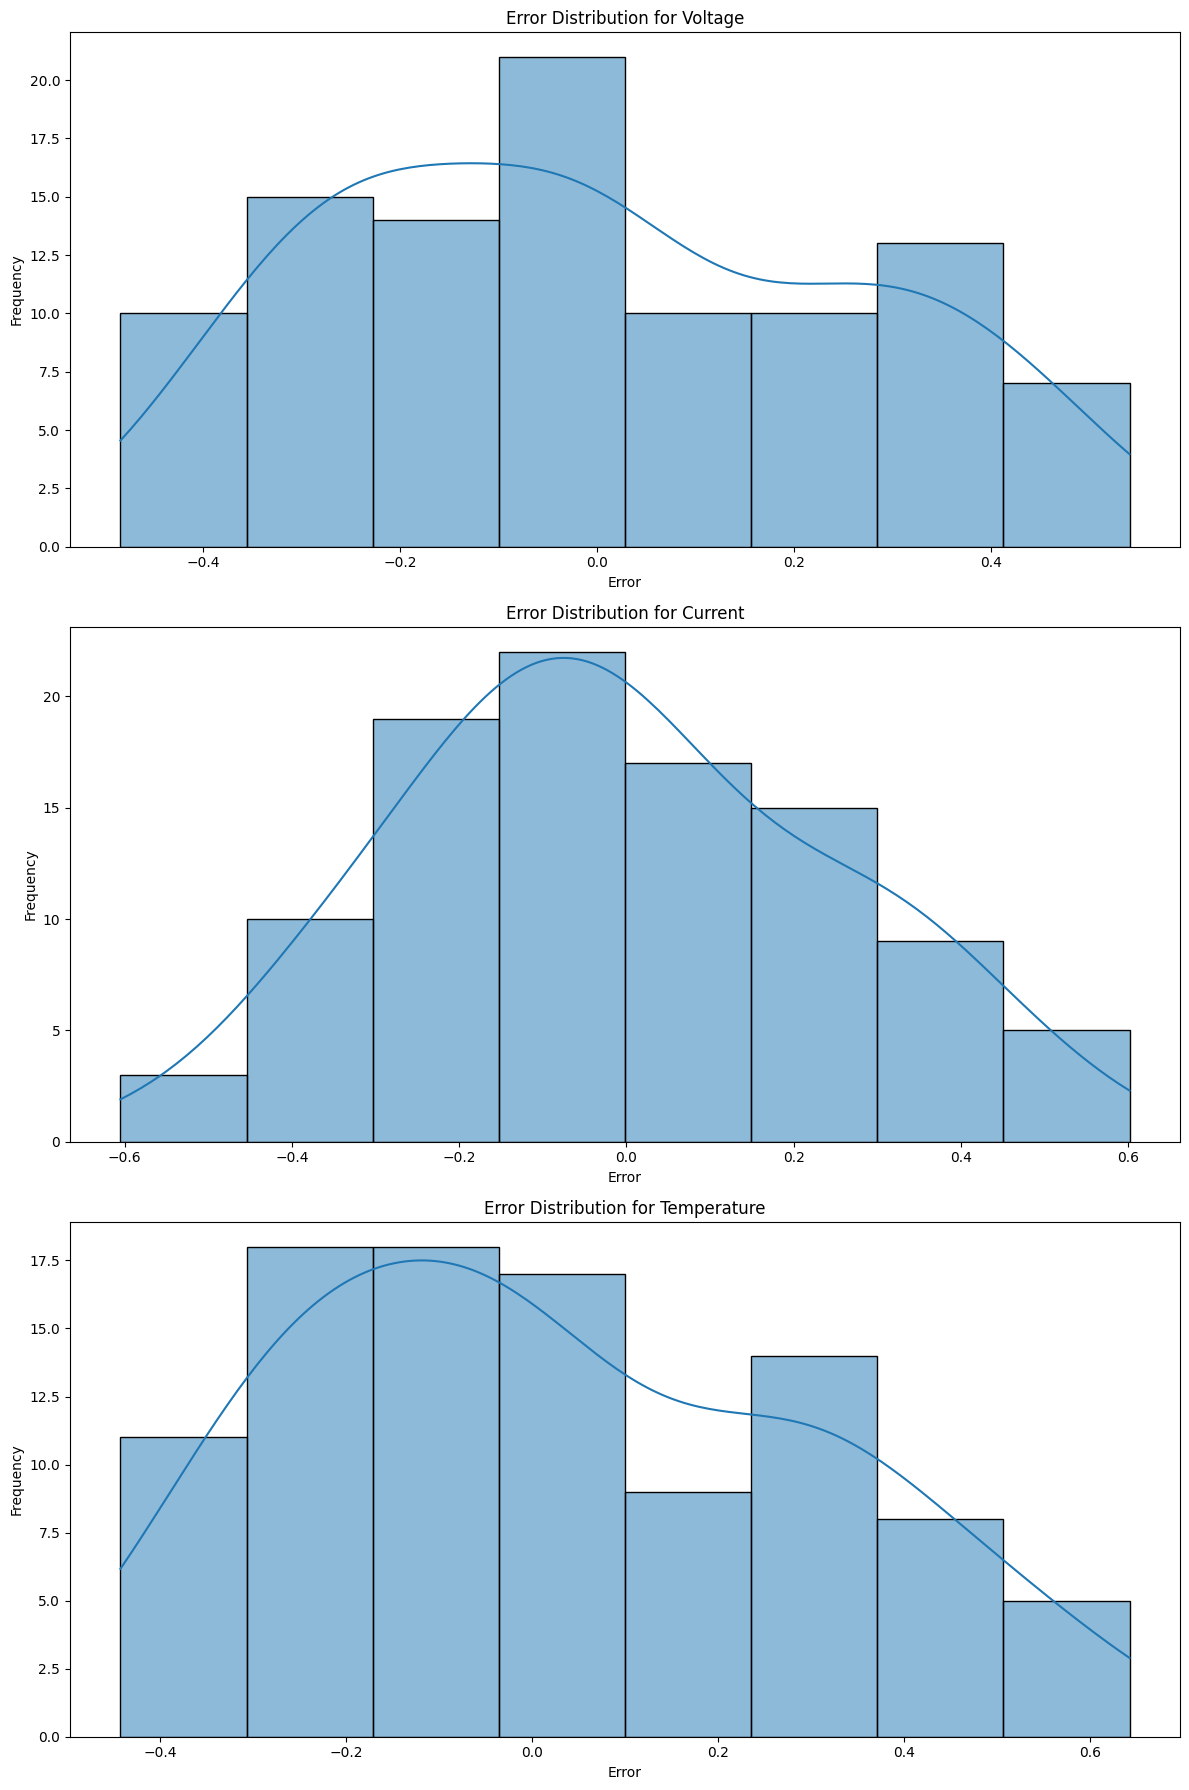

In [3]:
import seaborn as sns

# Plot the distribution of parameters
plt.figure(figsize=(12, 6))
for i in range(params.shape[1]):
    sns.histplot(params[:, i], kde=True, label=f'Parameter {i+1}')
plt.xlabel('Parameter Value')
plt.ylabel('Frequency')
plt.title('Distribution of Parameters')
plt.legend()
plt.show()

# Plot the correlation between predicted and experimental data
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
for i in range(3):
    sns.scatterplot(x=exp_data[:, i], y=adjusted_outputs[:, i], ax=axs[i])
    axs[i].set_xlabel('Experimental Data')
    axs[i].set_ylabel('Predicted Data')
    axs[i].set_title(f'Correlation between Predicted and Experimental Data for {output_labels[i]}')
    axs[i].plot([exp_data[:, i].min(), exp_data[:, i].max()], [exp_data[:, i].min(), exp_data[:, i].max()], 'r--')
plt.tight_layout()
plt.show()

# Plot the error distribution
errors = exp_data - adjusted_outputs
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
for i in range(3):
    sns.histplot(errors[:, i], kde=True, ax=axs[i])
    axs[i].set_xlabel('Error')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Error Distribution for {output_labels[i]}')
plt.tight_layout()
plt.show()